# Dataset: CIFAR 10

> CIFAR 10


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp cifar

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import fastcore.all as fc
from nbdevAuto import functions
import os
import glob
import shutil
import numpy as np

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
# Specify the directory path
directory_path = 'Data/cifar-10-batches-py'

In [ ]:
# Use glob to find all files starting with 'data' in the specified directory
matching_files = glob.glob(f'{directory_path}/data*')

# Print the list of matching files
for file_path in matching_files:
    print(file_path)

Data/cifar-10-batches-py/data_batch_5
Data/cifar-10-batches-py/data_batch_1
Data/cifar-10-batches-py/data_batch_3
Data/cifar-10-batches-py/data_batch_2
Data/cifar-10-batches-py/data_batch_4


In [ ]:
images = unpickle('Data/cifar-10-batches-py/data_batch_5')

In [ ]:
type(images)

dict

In [ ]:
keys = list(images.keys())
keys

[b'batch_label', b'labels', b'data', b'filenames']

In [ ]:
image1 = images[keys[2]][2]


(0, 255)

In [ ]:
len(images[keys[3]])

10000

In [ ]:

# Create an empty array to hold the reshaped image
reshaped_array = np.empty((32, 32, 3), dtype=np.uint8)
image1.min(), image1.max()
# Assign the values of the image1 array to the reshaped_array
reshaped_array[:,:,0] = image1[0:1024].reshape(32, 32)
reshaped_array[:,:,1] = image1[1024:2048].reshape(32, 32)
reshaped_array[:,:,2] = image1[2048:3072].reshape(32, 32)


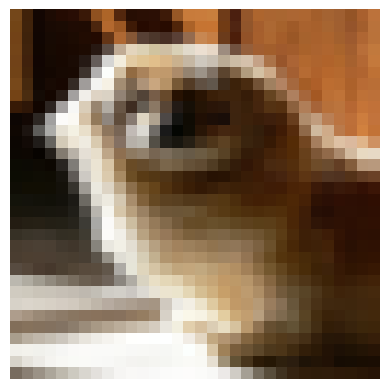

In [ ]:
# Display the image
plt.imshow(reshaped_array)
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
reshaped_array.shape

(32, 32, 3)

In [ ]:
class Cifar:
    def __init__(self, path):
        self.path = Path(path)
        self.files = glob(str(path/'**/*.JPEG'), recursive=True)
    def __len__(self): return len(self.files)
    def __getitem__(self, i): return self.files[i],Path(self.files[i]).parent.parent.name
    